In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('./data/final_processed_data.csv')
df.head()

,moistr,volmat,fixedc,ash,hydrgn,carbon,nitrgn,oxygen,sulfur,gcv
0,6.98,33.02,57.42,2.58,5.14,71.80,1.13,18.91,0.44,12312
1,11.15,26.39,58.32,4.14,5.05,66.71,1.40,22.10,0.60,11290
2,2.38,29.88,54.64,13.10,4.66,69.69,1.25,6.07,5.23,12674
3,3.38,28.61,40.39,27.62,4.30,55.02,1.15,6.78,5.13,10130
4,10.67,27.92,54.50,6.91,5.43,70.17,1.54,14.80,1.15,12559


In [3]:
# selecting features and label
X = df.iloc[:, :-1]  # features
y = df.iloc[:,-1]  # label
X.shape, y.shape

((6582, 9), (6582,))

In [4]:
# spliting into training and testing set for both X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=27)

G:\python_env\pytorchEnv2\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [6]:
# function to convert seconds to into hours, minutes and seconds
# this function is used to measure the time taking by the models
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [8]:
# Loading the svr model from svm and GridSearchCV from model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import time

regr = GridSearchCV(
    RandomForestRegressor(), 
    {
        'n_estimators': [50, 70, 90, 100, 110, 130, 150],
        'criterion': ['mse', 'friedman_mse','absolute_error', 'poisson'],
        'max_depth': [1,2,3,None],
        # 'max_features': ['sqrt', 'log2', None],
        'min_samples_split': [2,3,4,5],
        # 'min_weight_fraction_leaf': [0, 1,2,3],
        # 'max_leaf_nodes': [1,2,3,4,5],
    }, 
    cv=5, 
    scoring=['neg_mean_squared_error', 'r2'], 
    refit='r2',
    verbose=1)

start = time.time()
# enter your code below this line to calculate time it take

#Fit the model
regr.fit(X_train, y_train)

# enter you code above this line  to calculate time it take   
end = time.time()

print('run_time:', convert(end-start), 'h:m:s')

#regr.cv_results_

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
G:\python_env\pytorchEnv2\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
G:\python_env\pytorchEnv2\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
G:\python_env\pytorchEnv2\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
G:\python_env\pytorchEnv2\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
G:\python_env\pytorchEnv2\lib\site-packages\sklearn\utils\f

KeyError: 'absolute_error'

In [10]:
# printing the best combination of parameter that perform the best
print(regr.best_params_)

# the best performing score
print(regr.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# converting the results to a readable format using dataFrame
df = pd.DataFrame(regr.cv_results_)
# getting all parameter combinations and their performance result
result = df[['param_n_estimators', 'param_criterion', 'param_max_depth', 'param_max_features', 'min_samples_split',
            'mean_test_r2', 'mean_test_neg_mean_squared_error']]
result.to_csv('./output/random_forest/performance_result_for_random_forest_gridsearchCV.csv')
result

In [ ]:
import time
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=regr.best_params_['n_estimators'],
                                    criterion=regr.best_params_['criterion'],
                                    max_depth=regr.best_params_['max_depth'],
                                    max_features=regr.best_params_['max_features'],
                                    min_samples_split=regr.best_params_['min_samples_split']
                                    verbose=1)

start = time.time() # starting of the time
regressor.fit(X_train, y_train) # fit/train the model

end = time.time() # ending of the time
print('run_time:', convert(end - start), 'h:m:s')

pred_1 = regressor.predict(X_train) # prediction for training set
pred_2 = regressor.predict(X_test) # prediction for testing set
pred_3 = regressor.predict(X) # prediction for whole dataset

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [ ]:
# saving training, testing and y data with their predicted data in a excel file with different sheets
a = np.stack([y_train, pred_1], axis=1) # training
a = pd.DataFrame(a, columns=['y_train', 'y_train_pred'])

b = np.stack([y_test, pred_2], axis=1) # testing 
b = pd.DataFrame(b, columns=['y_test', 'y_test_pred'])

c = np.stack([y, pred_3], axis=1) # whole data
c = pd.DataFrame(c, columns=['y', 'y_pred'])

with pd.ExcelWriter("./output/random_forest/predicted_random_forest_model.xlsx") as writer:
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    a.to_excel(writer, sheet_name="training", index=True)
    b.to_excel(writer, sheet_name="testing", index=True)
    c.to_excel(writer, sheet_name="whole_data", index=True)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

train_r2 = r2_score(y_train,pred_1) # r2_score for training set
train_mae = mean_absolute_error(y_train, pred_1) # mean absolute error for training set
train_mse = mean_squared_error(y_train, pred_1) # mean squared error for training set
train_mape = mean_absolute_percentage_error(y_train, pred_1) # mean_absolute_percentage_error for training set
train_ev = explained_variance_score(y_train, pred_1) 
train_maxE = max_error(y_train, pred_1)
train_minE = min(abs(y_train - pred_1))

test_r2 = r2_score(y_test, pred_2) # r2_score for testing set
test_mae = mean_absolute_error(y_test, pred_2) # mean absolute error for testing set
test_mse = mean_squared_error(y_test, pred_2) # mean squared error for testing set
test_mape = mean_absolute_percentage_error(y_test, pred_2) # mean_absolute_percentage_error for testing set
test_ev = explained_variance_score(y_test, pred_2) 
test_maxE = max_error(y_test, pred_2)
test_minE = min(abs(y_test - pred_2))

r2 = r2_score(y, pred_3) # r2_score for whole dataset
mae = mean_absolute_error(y, pred_3) # mean absolute error for whole dataset
mse = mean_squared_error(y, pred_3) # mean squared error for whole dataset
mape = mean_absolute_percentage_error(y, pred_3) # mean_absolute_percentage_error for whole dataset
ev = explained_variance_score(y, pred_3) 
maxE = max_error(y, pred_3)
minE = min(abs(y - pred_3))

metrics = {
'performance_metrics': ['R2', 'MAE', 'MSE', 'MAPE', 'EV', 'maxE', 'minE'],
'training': [train_r2, train_mae, train_mse, train_mape, train_ev, train_maxE, train_minE],
'testing': [test_r2, test_mae, test_mse, test_mape, test_ev, test_maxE, test_minE],
'whole': [r2, mae, mse, mape, ev, maxE, minE]
}

performance_metrics = pd.DataFrame(metrics)
performance = performance_metrics.transpose()
performance.to_csv('./output/random_forest/performance_random_forest.csv')
performance

,0,1,2,3,4,5,6
performance_metrics,R2,MAE,MSE,MAPE,EV,maxE,minE
training,0.999263,39.614359,3997.225443,0.003883,0.999264,1167.15,0.0
testing,0.996236,104.05757,21442.112339,0.010236,0.996237,1586.65,0.1
whole,0.998324,58.951238,9231.751669,0.005789,0.998324,1586.65,0.0


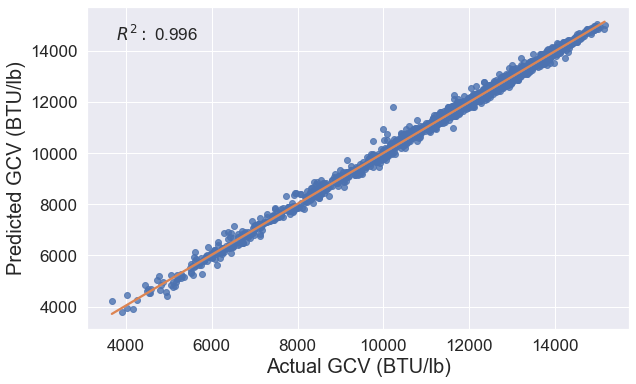

In [ ]:
plt.figure(figsize=(9, 5.5))

sns.regplot(x=y_test, y=pred_2, scatter_kws={"color": "C0"}, line_kws={"color": "C1"})
plt.text(3775, 14389, "$R^2:$ {:.3f}".format(test_r2), fontsize=17)

plt.xlabel("Actual GCV (BTU/lb)", fontsize=20)
plt.ylabel("Predicted GCV (BTU/lb)", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.tight_layout()
plt.savefig("./output/random_forest/regression_plot_random_forest.png", dpi=300)
plt.show()

In [ ]:
#from sklearn.externals import joblib
from joblib import dump, load
dump(regressor, './output/random_forest/trained_random_forest_model.joblib')

#clf = load('trained_linear_regression_model.joblib')

['./output/decision_tree/trained_decision_tree_model.joblib']